In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
events_data = pd.read_csv('event_data_train.zip')

In [5]:
events_data.head(5)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


trying to detect id of course owner

In [6]:
events_data.groupby('user_id').count()\
.sort_values(by=['step_id'], ascending=False).head(5)

,step_id,timestamp,action
user_id,,,
20907,33043,33043,33043
10794,16436,16436,16436
25279,10179,10179,10179
1046,9095,9095,9095
3572,7905,7905,7905


see what kind of unique actions do we have

In [7]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [8]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [9]:
events_data.head(5)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [10]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [11]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [12]:
events_data['day'] = events_data.date.dt.date

In [13]:
events_data.groupby('day').user_id.nunique().head(20)

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
2015-06-20    294
2015-06-21    292
2015-06-22    516
2015-06-23    520
2015-06-24    471
2015-06-25    431
2015-06-26    392
2015-06-27    334
2015-06-28    345
2015-06-29    579
2015-06-30    508
2015-07-01    476
2015-07-02    437
2015-07-03    458
2015-07-04    364
Name: user_id, dtype: int64

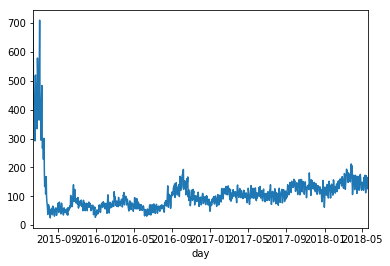

In [14]:
events_data.groupby('day').user_id.nunique().plot()

In [15]:
events_data[events_data.action == 'passed'] \
.groupby('user_id', as_index=False)\
.agg({'step_id':'count'})\
.sort_values(by=['step_id'], ascending=False).head(5)

,user_id,step_id
8631,13365,198
16510,25632,198
2995,4546,198
13758,21395,198
10641,16489,198


In [16]:
events_data.head(5)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [18]:
users_data = pd.read_csv('submissions_data_train.zip')

In [35]:
users_data.head(5)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [81]:
users_data[users_data.submission_status == 'wrong'] \
.groupby('step_id') \
.agg('count').sort_values(by='user_id', axis=0, ascending=False)

,timestamp,submission_status,user_id
step_id,,,
31978,16084,16084,16084
32031,13373,13373,13373
32202,13002,13002,13002
33481,10300,10300,10300
32075,10003,10003,10003
32206,9388,9388,9388
31972,8960,8960,8960
32174,7778,7778,7778
32809,7748,7748,7748


In [64]:
users_data[users_data.submission_status == 'wrong'].head()

,step_id,timestamp,submission_status,user_id
2,31972,1478852149,wrong,15853
4,31976,1434348123,wrong,15853
15,32031,1434363465,wrong,15853
33,32795,1434520465,wrong,15853
38,32812,1434346160,wrong,15853


In [50]:
events_data[events_data.action == 'passed'].head(5)

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15


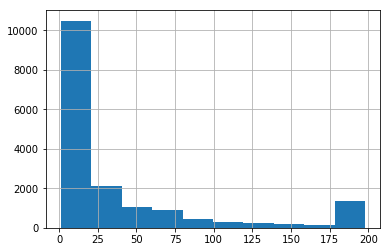

In [48]:
events_data[events_data.action == 'passed'] \
.groupby('user_id', as_index=False)\
.agg({'step_id':'count'})\
.rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [25]:
events_data[events_data.action == 'passed'] \
.groupby('user_id', as_index=False)\
.agg({'step_id':'count'})\
.rename(columns={'step_id':'passed_steps'}).passed_steps.min()

1

In [30]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
.reset_index() \
.head()


action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


task: find harders step in courser


In [65]:
events_data[events_data.action == 'passed'] \
.groupby('user_id', as_index=False)\
.agg({'step_id':'count'})\
.rename(columns={'step_id':'passed_steps'}) \
.head()


,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
